# Beberapa Penerapan dari Algoritma-Algoritma Kecerdasan Buatan

## Algoritma Genetika

1. Menggunakan bahasa pemrograman python
2. Menggunakan library **PyGAD**

**PyGAD**: Python library untuk algoritma genetika [https://pygad.readthedocs.io/en/latest/](https://pygad.readthedocs.io/en/latest/)

<p align="center">
  <img src="img/img1.png" />
</p>

- Cara install library **PyGAD**:

`pip install pygad`

### Bagaimana cara menggunakan **PyGAD**?

1. Persiapkan parameter `fitness_func`
2. Persiapkan parameter lainnya
3. Import `pygad`
4. Membuat *instance* dari `pygad.GA` *class*
5. Jalankan GA
6. Plot hasilnya
7. Tampilkan solusi terbaik

## Penerapan GA

### Contoh 1 - Fungsi Minimum

1. Contoh penggunaan PyGAD dalam optimalisasi.
2. Mengoptimalkan persamaan

$$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $$

3. Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum

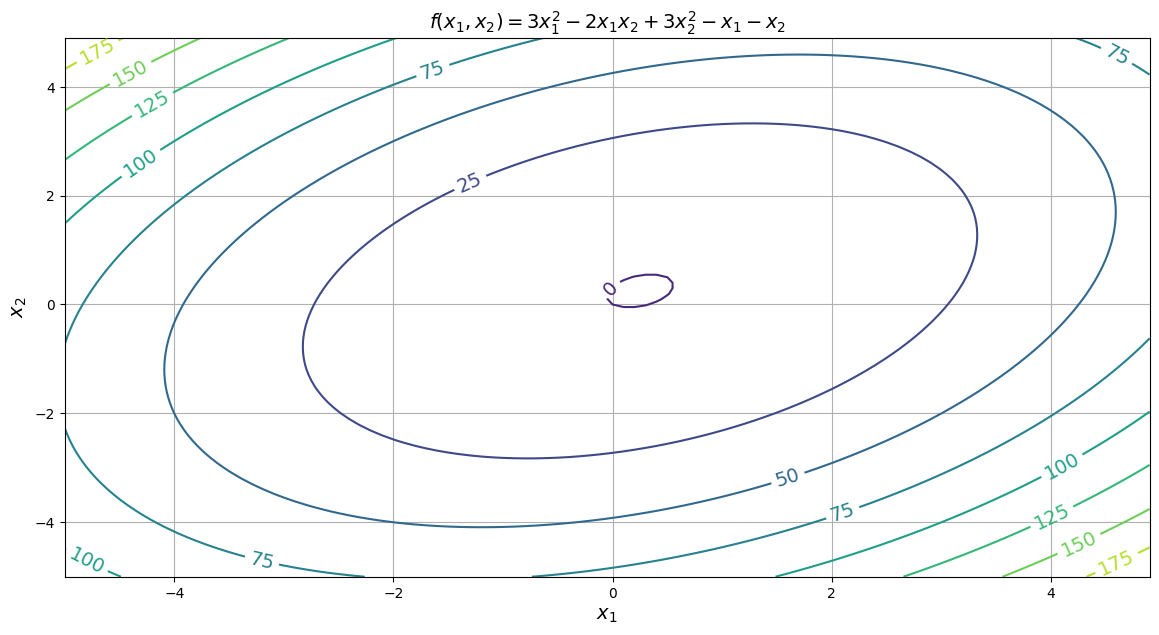

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y

x = np.vstack((np.array([np.arange(-5,5,0.1)]),
               np.array([np.arange(-5,5,0.1)])))

X,Y = np.meshgrid(x[0], x[1])
Z = pers1(X,Y)
fig, ax = plt.subplots(figsize=(14, 7))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=14)
ax.set_title('$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $', fontsize=14)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.grid()

#### 1. Persiapkan parameter `fitness_func`

- Persiapkan parameter `fitness_func`
- Gunakan persamaan $$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $$
- Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum

In [44]:
def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y

def calculate_fitness(ga_instance, solution, solution_idx):
    output = pers1(solution[0],solution[1])
    fitness = -output

    return fitness

#### 2. Persiapkan parameter lainnya

In [45]:
num_generations = 20
num_parents_mating = 3
sol_per_pop = 10
num_genes = 2
parent_selection_type="sss"
keep_parents=1
crossover_type="uniform"
mutation_type="random"
mutation_probability = .5

def on_generation(ga):
    print("Generation", ga.generations_completed)
    print(ga.population)

#### 3. Import `pygad`

In [46]:
import pygad

#### 4. Membuat *instance* dari `pygad.GA` *class*

In [47]:
ga_instance1 = pygad.GA(num_generations = num_generations,
                       num_parents_mating = num_parents_mating,
                       fitness_func = calculate_fitness,
                       sol_per_pop = sol_per_pop,
                       num_genes = num_genes,
                       parent_selection_type = parent_selection_type,
                       keep_parents = keep_parents,
                       crossover_type = crossover_type,
                       mutation_type = mutation_type,
                       mutation_probability = mutation_probability,
                       on_generation = on_generation
                       )

/home/fafa/miniconda3/envs/py311/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


#### 5. Jalankan GA

In [48]:
ga_instance1.run()

Generation 1
[[-0.05167339 -0.49686717]
 [-0.05167339  1.31711818]
 [ 1.2435167  -0.74198218]
 [-0.05167339  0.19324411]
 [ 1.2435167   0.26834463]
 [ 1.2435167   0.49443251]
 [ 0.6427222  -0.8307807 ]
 [ 1.2435167  -0.49686717]
 [ 0.56904079 -0.71012111]
 [ 0.23811469 -0.21894312]]
Generation 2
[[-0.05167339  0.19324411]
 [-0.43090758  0.19324411]
 [ 0.33958332 -0.49686717]
 [-0.05167339  0.41474227]
 [-0.05167339  0.2863469 ]
 [-0.072931    0.46131289]
 [-0.05167339 -0.5954238 ]
 [-0.05167339  0.71600689]
 [-0.66951349 -0.23763175]
 [ 0.63347147 -0.64877655]]
Generation 3
[[-0.05167339  0.19324411]
 [-0.05167339 -0.5675042 ]
 [-0.05167339  0.4483834 ]
 [ 0.37372512  0.68491336]
 [-0.05167339 -0.44423696]
 [-0.05167339  0.81903412]
 [-0.05167339  1.10720431]
 [-0.94281571  0.19324411]
 [-0.05167339 -0.23166636]
 [ 0.46144513  0.19324411]]
Generation 4
[[ 0.46144513  0.19324411]
 [ 0.24025247 -0.59044831]
 [-0.05167339 -0.27870136]
 [ 0.46144513  0.68491336]
 [ 0.81354913  0.19324411]


#### 6. Plot hasilnya

2024-03-07 06:04:55,917 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


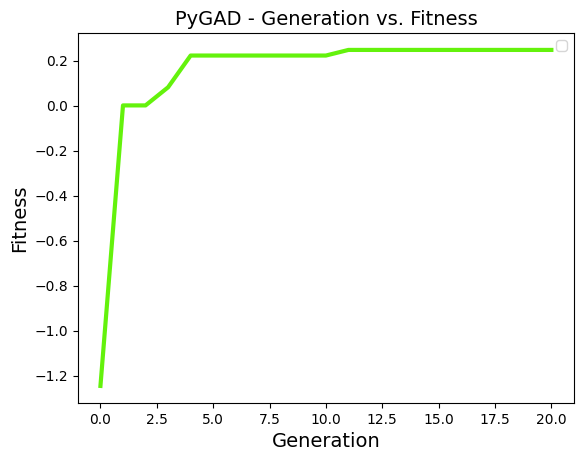

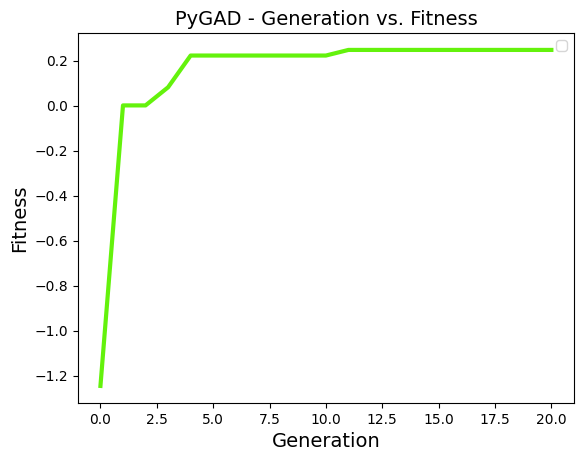

In [49]:
ga_instance1.plot_fitness()

#### 7. Tampilkan solusi terbaik

In [50]:
solution, solution_fitness, solution_idx = ga_instance1.best_solution()
print(f"Parameters dari solusi terbaik : {solution}")
print(f"Nilai fitness dari solusi terbaik = {-solution_fitness}")

Parameters dari solusi terbaik : [0.2259256  0.24915746]
Nilai fitness dari solusi terbaik = -0.24829970793848388


### Contoh 2 - Travelling Salesman Problem

1. Mencari rute terbaik
2. Mengunjungi semua kedai kopi janji jiwa
3. Mulai dari ITK, kembali ke ITK

<p align="center">
  <img src="img/img2.png" />
</p>

#### 1. Persiapkan parameter `fitness_func`

- Membuat tabel berisikan semua jarak antar titik
- Jarak dari ITK ke Janji Jiwa Grand City
<p align="center">
    <img src="img/img3.png" />
</p>

- Jarak dari ITK ke Janji Jiwa Bumi Nirwana

<p align="center">
    <img src="img/img4.png" />
</p>

- Jarak dari Janji Jiwa Grand City ke Janji Jiwa Bumi Nirwana

<p align="center">
    <img src="img/img5.png" />
</p>

- Sehingga didapatkan keseluruhan jarak antara semua titik
- Simpan dalam format file **csv**
<p align="center">
    <img src="img/img6.png" />
</p>

- Bagaimana `fitness_func`-nya?
- Optimalkan rute terpendek
- Contoh:
    - ITK--12.1 KM--Indrakila--3.3 KM--Grand City--2.6 KM--MT. Haryono--1.8 KM--Ruhui Rahayu--7.9 KM--Ahmad Yani--20.5 KM--ITK
    - TOTAL = 48.2 KM

In [51]:
import pandas as pd

data = pd.read_csv('data_janji_jiwa.csv')
data

,JARAK (KM),ITK,INDRAKILA,GRAND CITY,MT. HARYONO,RUHUI RAHAYU,AHMAD YANI
0,ITK,0.0,12.1,12.4,14.7,16.4,20.5
1,INDRAKILA,12.1,0.0,3.3,3.7,5.4,6.2
2,GRAND CITY,12.4,3.3,0.0,2.6,4.3,9.0
3,MT. HARYONO,14.7,3.7,2.6,0.0,1.7,6.8
4,RUHUI RAHAYU,16.4,5.4,4.3,1.8,0.0,7.9
5,AHMAD YANI,20.5,6.2,9.0,6.8,7.9,0.0


In [52]:
data.iloc[0]

JARAK (KM)       ITK
ITK              0.0
INDRAKILA       12.1
GRAND CITY      12.4
MT. HARYONO     14.7
RUHUI RAHAYU    16.4
AHMAD YANI      20.5
Name: 0, dtype: object

In [53]:
data.iloc[0,1]

0.0

In [54]:
data.iloc[0,1+1]

12.1

In [55]:
data.iloc[1]

JARAK (KM)      INDRAKILA
ITK                  12.1
INDRAKILA             0.0
GRAND CITY            3.3
MT. HARYONO           3.7
RUHUI RAHAYU          5.4
AHMAD YANI            6.2
Name: 1, dtype: object

In [56]:
def cal_fitness(ga_instance, solution, solution_idx):
    distance = 0
    # 0 1 2 3 4
    for i in range(len(solution)):
        if i == 0:
            distance += data.iloc[0, solution[i]+1]
        elif i == len(solution)-1:
            distance += data.iloc[solution[i-1], solution[i]+1] + data.iloc[solution[i], 1]
        else:
            distance += data.iloc[solution[i-1], solution[i]+1]

    return -distance

#### 2. Persiapkan parameter lainnya

In [57]:
num_generations = 20
num_parents_mating = 2
sol_per_pop = 10
num_genes = 5
gene_type = int
gene_space = np.arange(1,len(data))
allow_duplicate_genes=False
mutation_type='random'
mutation_percent_genes=50

def on_generation(ga):
    print("Generation", ga.generations_completed)
    print(ga.population)

#### 3. Import `pygad`

In [58]:
import pygad

#### 4. Membuat *instance* dari `pygad.GA` *class*

In [59]:
ga_instance2 = pygad.GA(num_generations = num_generations,
                       num_parents_mating = num_parents_mating,
                       fitness_func = cal_fitness,
                       sol_per_pop = sol_per_pop,
                       num_genes = num_genes,
                       gene_type = gene_type,
                       gene_space = np.arange(1,len(data)),
                       allow_duplicate_genes = allow_duplicate_genes,
                       on_generation = on_generation,
                       mutation_type = mutation_type,
                       mutation_percent_genes = mutation_percent_genes
                       )

/home/fafa/miniconda3/envs/py311/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


#### 5. Jalankan GA

In [60]:
ga_instance2.run()

Generation 1
[[2 4 5 3 1]
 [2 3 5 4 1]
 [5 4 2 1 3]
 [2 4 1 3 5]
 [3 4 5 2 1]
 [2 1 5 3 4]
 [2 4 5 3 1]
 [2 3 5 4 1]
 [3 4 5 2 1]
 [2 4 5 3 1]]
Generation 2
[[2 1 5 3 4]
 [2 5 3 1 4]
 [2 3 5 1 4]
 [5 1 2 3 4]
 [3 4 5 2 1]
 [4 1 5 3 2]
 [2 1 5 3 4]
 [3 4 5 2 1]
 [2 1 3 4 5]
 [3 1 5 2 4]]
Generation 3
[[2 1 5 3 4]
 [2 1 3 5 4]
 [5 4 2 3 1]
 [4 1 5 3 2]
 [3 1 5 2 4]
 [2 1 3 4 5]
 [2 1 4 3 5]
 [2 5 1 3 4]
 [2 3 5 1 4]
 [5 1 2 3 4]]
Generation 4
[[2 1 5 3 4]
 [2 1 5 3 4]
 [2 4 5 3 1]
 [5 3 2 1 4]
 [4 1 5 3 2]
 [2 3 5 1 4]
 [2 5 1 3 4]
 [1 2 5 3 4]
 [1 5 2 3 4]
 [4 1 5 3 2]]
Generation 5
[[2 1 5 3 4]
 [2 1 5 3 4]
 [3 2 5 1 4]
 [2 4 5 3 1]
 [2 1 3 5 4]
 [3 1 5 2 4]
 [2 5 1 3 4]
 [2 1 3 5 4]
 [2 1 3 5 4]
 [2 1 5 3 4]]
Generation 6
[[2 1 5 3 4]
 [2 3 5 1 4]
 [2 1 3 5 4]
 [5 1 2 3 4]
 [2 1 5 3 4]
 [2 1 4 3 5]
 [2 3 5 1 4]
 [3 1 5 2 4]
 [5 1 2 3 4]
 [3 2 5 1 4]]
Generation 7
[[2 1 5 3 4]
 [2 1 5 3 4]
 [2 1 5 3 4]
 [2 3 4 1 5]
 [1 5 2 3 4]
 [2 3 5 1 4]
 [1 2 5 3 4]
 [2 3 5 1 4]
 [2 1 5 3 4]
 [2 1 

#### 6. Plot hasilnya

2024-03-07 06:04:56,423 - matplotlib.legend - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


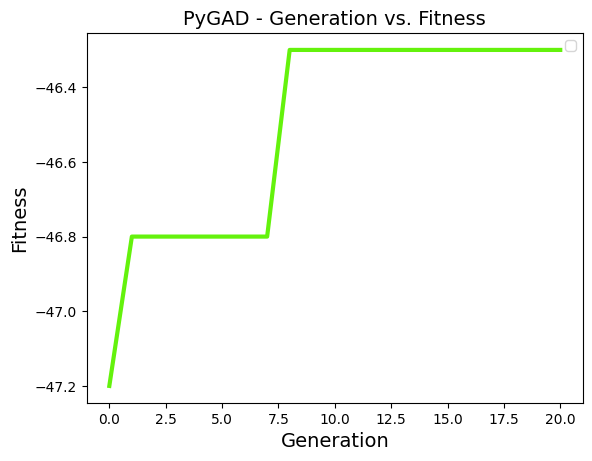

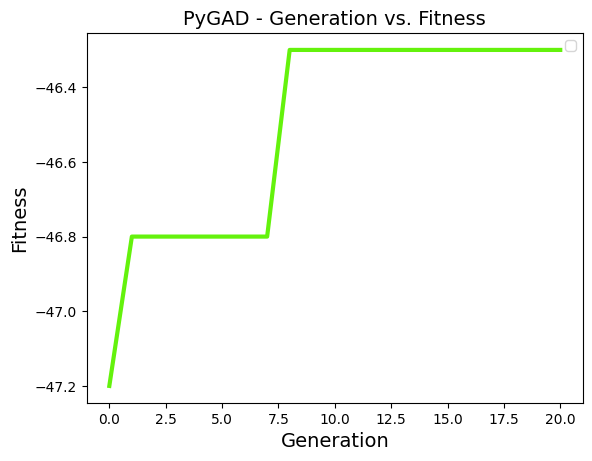

In [61]:
ga_instance2.plot_fitness()

#### 7. Tampilkan solusi terbaik

In [62]:
solution, solution_fitness, solution_idx = ga_instance2.best_solution()
print(f"Parameters dari solusi terbaik : {solution}")
print(f"Nilai fitness dari solusi terbaik = {-solution_fitness}")

Parameters dari solusi terbaik : [2 1 5 4 3]
Nilai fitness dari solusi terbaik = 46.3


In [63]:
rute_terbaik = data.iloc[0,0]
for i in range(len(solution)):
    rute_terbaik += ' -> ' + data.iloc[solution[i],0]

rute_terbaik += " -> " + data.iloc[0,0]

print("Rute ngopi terbaik adalah:\n'{}'\ndengan total jarak tempuh {:.2f} km".format(rute_terbaik,-solution_fitness))

Rute ngopi terbaik adalah:
'ITK -> GRAND CITY -> INDRAKILA -> AHMAD YANI -> RUHUI RAHAYU -> MT. HARYONO -> ITK'
dengan total jarak tempuh 46.30 km


## Particle Swarm Optimization

1. Menggunakan bahasa pemrograman python
2. Menggunakan library **PySwarms**

**PySwarms**: Python library untuk particle swarm optimization (PSO) [https://pyswarms.readthedocs.io/en/latest/](https://pyswarms.readthedocs.io/en/latest/)

<p align="center">
  <img src="img/img7.png" />
</p>

- Cara install library **PySwarms**:

`pip install pyswarms`

### Bagaimana cara menggunakan **PySwarms**?
1. Persiapkan parameter `fitness_func`
2. Persiapkan parameter lainnya
3. Import `pyswarms`
4. Membuat `optimizer`
5. Jalankan PSO
6. Plot hasilnya
7. Tampilkan solusi terbaik

## Penerapan PSO

### Contoh 1 - Fungsi Minimum

1. Contoh penggunaan PySwarms dalam optimalisasi.
2. Mengoptimalkan persamaan

$$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $$

3. Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum

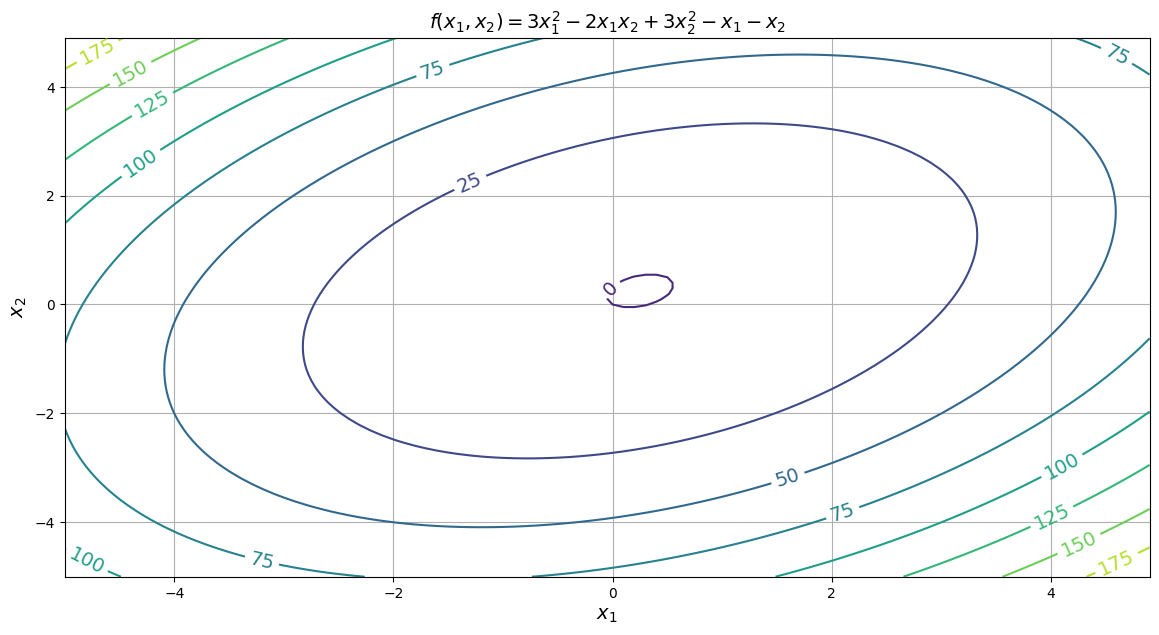

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y

x = np.vstack((np.array([np.arange(-5,5,0.1)]),
               np.array([np.arange(-5,5,0.1)])))

X,Y = np.meshgrid(x[0], x[1])
Z = pers1(X,Y)
fig, ax = plt.subplots(figsize=(14, 7))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=14)
ax.set_title('$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $', fontsize=14)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.grid()

#### 1. Persiapkan parameter `fitness_func`

- Persiapkan parameter `fitness_func`
- Gunakan persamaan $$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $$
- Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum

In [65]:
def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y

def calculate_fitness(x):
    output = pers1(x[:,0],x[:,1])

    return output

#### 2. Persiapkan parameter lainnya

In [66]:
options     = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
n_particles = 10
dimensions  = 2
max_iter    = 20

#### 3. Import `pyswarms`

In [67]:
import pyswarms as ps

#### 4. Membuat `optimizer`

1. Membuat `optimizer` berdasarkan parameter yang sudah ditentukan sebelumnya
2. Bisa menggunakan Global Best atau Personal Best

In [68]:
from pyswarms.single.global_best import GlobalBestPSO

optimizer = GlobalBestPSO(n_particles=n_particles, dimensions=dimensions, options=options)

#### 5. Jalankan PSO

In [69]:
cost, pos = optimizer.optimize(calculate_fitness, max_iter)

2024-03-07 06:04:57,006 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=-0.249 
2024-03-07 06:04:57,027 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.24866741246922192, best pos: [0.23933003 0.26496353]


#### 6. Plot hasilnya

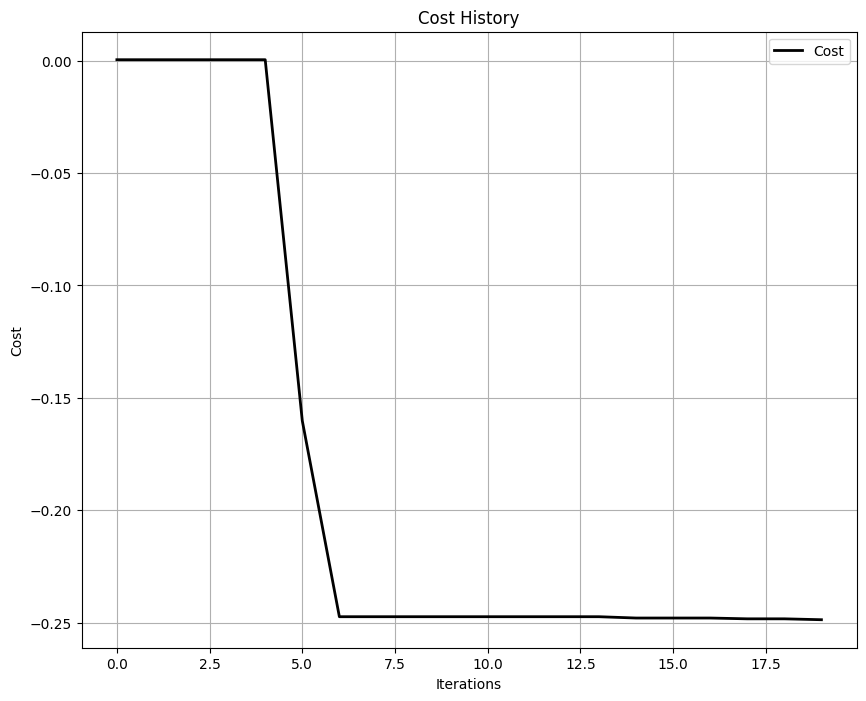

In [70]:
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

plot_cost_history(cost_history=optimizer.cost_history)
plt.grid()
plt.show()

#### 7. Tampilkan solusi terbaik

In [71]:
print("Fitness terbaik = ", cost)
print("Posisi terbaik = ", pos)

Fitness terbaik =  -0.24866741246922192
Posisi terbaik =  [0.23933003 0.26496353]


### Contoh 2 - Travelling Salesman Problem

1. Mencari rute terbaik
2. Mengunjungi semua kedai kopi janji jiwa
3. Mulai dari ITK, kembali ke ITK

<p align="center">
  <img src="img/img2.png" width="800"/>
</p>

#### 1. Persiapkan parameter `fitness_func`

- Sama seperti yang telah kita lakukan di GA

In [80]:
import pandas as pd

data = pd.read_csv('data1.csv')
data

,JARAK (KM),ITK,INDRAKILA,GRAND CITY,MT. HARYONO,RUHUI RAHAYU,AHMAD YANI
0,ITK,0.0,1.0,1.0,14.7,16.4,20.5
1,INDRAKILA,1.0,0.0,3.3,3.7,5.4,1.0
2,GRAND CITY,1.0,3.3,0.0,1.0,4.3,9.0
3,MT. HARYONO,14.7,3.7,1.0,0.0,1.0,6.8
4,RUHUI RAHAYU,16.4,5.4,4.3,1.0,0.0,1.0
5,AHMAD YANI,20.5,1.0,9.0,6.8,1.0,0.0


In [81]:
# Fungsi merubah posisi partikel menjadi rute
def pos2route(x):

    row, col = x.shape

    for r in range(row):
        x_sorted = np.sort(x[r,:])

        x_new = np.zeros(x_sorted.shape)
        for c in range(col):
            x_new += x[r,:]/x[r,:]*(x[r,:] == x_sorted[c])*(c+1)
        
        x[r,:] = x_new

    return np.int_(x)

# Fungsi menghitung jarak berdasarkan rute
def cal_distance(route):
    distance = 0

    for i in range(len(route)):
        if i == 0:
            distance += data.iloc[0, route[i]+1]
        elif i == len(route)-1:
            distance += data.iloc[route[i-1], route[i]+1] + data.iloc[route[i], 1]
        else:
            distance += data.iloc[route[i-1], route[i]+1]

    return distance


# fitness function
def calculate_fitness(x):
    
    x = pos2route(x)

    row, col = x.shape
    output = np.zeros(row)
    
    for r in range(row):
        output[r] = cal_distance(x[r,:])

    return output

#### 2. Persiapkan parameter lainnya

In [82]:
dimensions  = len(data)-1
n_particles = 10
options     = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
max_iter    = 20

#### 3. Import `pyswarms`

In [83]:
import pyswarms as ps

#### 4. Membuat `optimizer`

1. Membuat `optimizer` berdasarkan parameter yang sudah ditentukan sebelumnya
2. Bisa menggunakan Global Best atau Personal Best

In [84]:
from pyswarms.single.global_best import GlobalBestPSO

optimizer = GlobalBestPSO(n_particles=n_particles, dimensions=dimensions, options=options)

#### 5. Jalankan PSO

In [85]:
cost, pos = optimizer.optimize(calculate_fitness, max_iter)

2024-03-07 06:06:18,063 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=6  
2024-03-07 06:06:18,115 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.0, best pos: [2. 3. 4. 5. 1.]


#### 6. Plot hasilnya

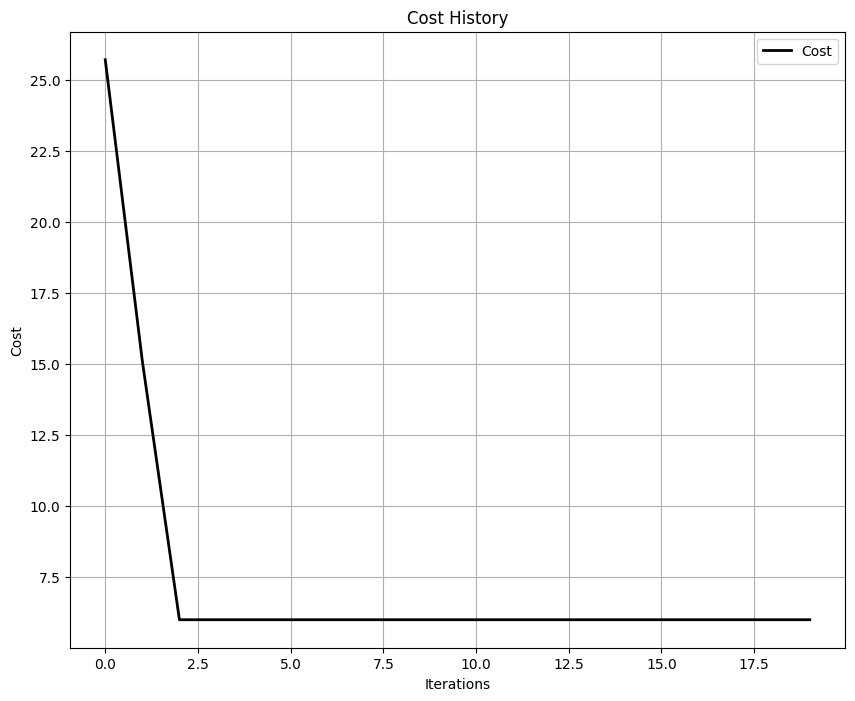

In [86]:
from pyswarms.utils.plotters import plot_cost_history

plot_cost_history(cost_history=optimizer.cost_history)
plt.grid()
plt.show()

#### 7. Tampilkan solusi terbaik

In [87]:
rute_terbaik = data.iloc[0,0]
for i in range(len(pos)):
    rute_terbaik += ' -> ' + data.iloc[np.int_(pos[i]),0]

rute_terbaik += " -> " + data.iloc[0,0]

print("Rute ngopi terbaik adalah:\n'{}'\ndengan total jarak tempuh {:.2f} km".format(rute_terbaik, cost))

Rute ngopi terbaik adalah:
'ITK -> GRAND CITY -> MT. HARYONO -> RUHUI RAHAYU -> AHMAD YANI -> INDRAKILA -> ITK'
dengan total jarak tempuh 6.00 km
